# Homework 2: Error Analysis of Euler Scheme (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 08.05.2020.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## Introduction: The Two-Body Problem

Newton’s Equation for the relative motion of two bodies under their mutual gravitational force is 

$$\ddot{\bf{r}} = - \frac{GM}{r^2}\frac{\bf{r}}{r} \, ,$$

where $G$ is the gravitational constant and $M = M1+M2$ the sum of the masses of the two bodies. This second order ordinary differential equation (ODE) can be transformed into two coupled first order ODEs by

$$\dot{\bf{r}} = {\bf{v}} \, , \qquad \dot{\bf{v}} = - \frac{GM}{r^2}\frac{\bf{r}}{r} \,.$$

For numerical studies these equations should be first transformed to dimensionless equations by ${\bf{s}}={\bf{r}}/R_0$, $\tau = t/T_0$ and ${\bf{w}}={\bf{v}}/V_0$, where $R_0$ is an arbitrary scaling radius, which should be selected according to the
given problem (e.g. initial separation), $T_0 = \sqrt{R_0^3/GM}$ and $V_0 = \sqrt{GM/R_0}$.

In the following we will numerically solve the two coupled first order ODEs

$$\frac{d{\bf{s}}}{d\tau} = {\bf{w}} \, , \qquad \frac{d{\bf{w}}}{d\tau} = - \frac{{\bf{s}}}{s^3} \,.$$

## Our Code for the Euler Scheme from the Practice Class

In [2]:
#Define constants
G = 1
M1 = 1
M2 = 1
R0 = 0.5
V0 = np.sqrt(G*(M1+M2)/R0)
T0 = R0/V0

#Initial conditions
r0 = np.array([1,0,0])
v0 = np.array([0,V0/np.sqrt(2),0])

#Time steps
dt = 0.0001

#Dimensionless quantities
d_tau = dt/T0
s0 = r0/R0
w0 = v0/V0

#Time for one orbit
def t_orbit(s0, w0):
    e_tot = (np.linalg.norm(w0)**2)/2 - 1/np.linalg.norm(s0)
    a = - 0.5/e_tot*G*M1*M2
    return np.sqrt(4*np.pi**2*a**3/(G*(M1*M2)))
T = t_orbit(s0, w0)

In [3]:
#Forward Euler Scheme
def forward_euler(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    s = s0
    w = w0
    for i in tau:
        s1 = s
        s = s + w*d_tau
        w = w - s1/np.linalg.norm(s1)**3 * d_tau
    return s, w

In [4]:
#For plotting the trajectory
def plot_euler_trajectory(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    x = []
    y = []
    s = s0
    w = w0
    for i in tau:
        x.append(s[0])
        y.append(s[1])
        
        s1 = s
        s = s + w*d_tau
        w = w - s1/np.linalg.norm(s1)**3 * d_tau
    plt.axis('equal')
    plt.plot(x,y)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

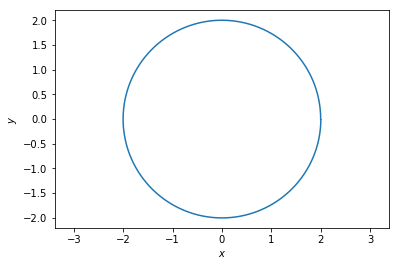

In [5]:
plot_euler_trajectory(s0, w0, d_tau, T)

In [6]:
#Runge-Lenz-Laplace vector
def runge_lenz_vec(s, w):
    return np.cross(w,np.cross(s,w))-s/np.linalg.norm(s)

In [7]:
#Eccentricity, equals 0 for circular orbit
def eccentricity(s, w):
    return np.linalg.norm(runge_lenz_vec(s,w))/(G*(M1*M2))

### a) Choose 3 different eccentricities by varying the initial velocity, and study the set-up for a wide range of different time steps. Make sure that $\Delta{t}$ spans orders of magnitude. Integrate the 2-body problem for two orbits. 

In [8]:
#Vary initial velocity
v0 = np.array([0,V0/np.sqrt(2),0])
w0 = v0/V0

#Integrate for 2 orbits
s = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[0]
w = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[1]
print(eccentricity(s, w))

7.24860530535e-06


In [9]:
#Vary initial velocity
v0 = np.array([0,1,0])
w0 = v0/V0

#Integrate for 2 orbits
s = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[0]
w = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[1]
print(eccentricity(s, w))

0.503763565213


In [10]:
#Vary initial velocity
v0 = np.array([0,V0/3,0])
w0 = v0/V0

#Integrate for 2 orbits
s = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[0]
w = forward_euler(s0, w0, d_tau, 2*t_orbit(s0, w0))[1]
print(eccentricity(s, w))

0.797338991776


In [11]:
#Return to circular orbit
v0 = np.array([0,V0/np.sqrt(2),0])
w0 = v0/V0

#Wide range of different time steps
for dtau in np.linspace(0.0001,1,11):
    s = forward_euler(s0, w0, dtau, 2*t_orbit(s0, w0))[0]
    w = forward_euler(s0, w0, dtau, 2*t_orbit(s0, w0))[1]
    print(eccentricity(s, w))

4.5520978566e-07
0.0966245202356
0.120340694877
0.203016746273
0.31758606226
0.42147435997
0.5207797035
0.61866592003
0.716806567485
0.816773298123
0.919286501918


One can see that the eccentricity grows with larger time steps, as one could expect. With larger time steps the integration becomes less precise and the initial circular orbit gets more and more eccentric.

The accuracy of the forward Euler scheme scales with $\mathcal{O}(\Delta{t})$.

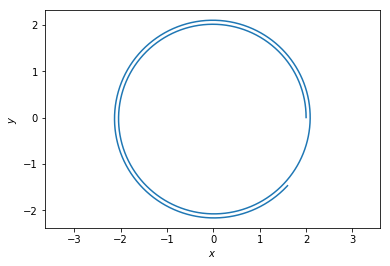

In [12]:
#2-Body Problem integrated for two orbits
plot_euler_trajectory(s0, w0, 0.01, 2*t_orbit(s0, w0))

### Plot, in a double-logarithmic fashion, the error in the energy at the end of this orbit as a function of the time step $\Delta{t}$. 

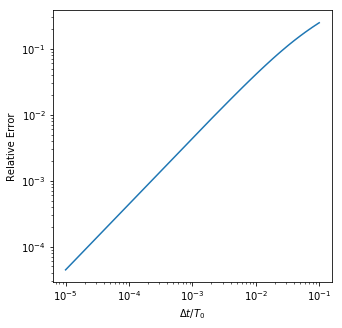

In [13]:
def energy_error(d_tau):
    E0 = (np.linalg.norm(w0)**2)/2 - 1/np.linalg.norm(s0)
    s = forward_euler(s0, w0, d_tau, T)[0]
    w = forward_euler(s0, w0, d_tau, T)[1]
    Energy = (np.linalg.norm(w)**2)/2 - 1/np.linalg.norm(s)
    return np.abs(Energy-E0)/np.abs(E0)

dtau = np.linspace(0.00001,0.1,50)
error = []

for i in dtau:
    error.append(energy_error(i))

plt.figure(figsize=(5.0,5.0))
plt.loglog(dtau,error)
plt.xlabel(r'$\Delta t / T_0$')
plt.ylabel(r'Relative Error')

### Discuss the result, is it consistent with what one should expect?

With smaller time steps the integration error gets smaller, which we expect since the accuracy of the forward Euler scheme scales with $\mathcal{O}(\Delta{t})$.

### b) Do the same as above, but now employ the leapfrog integrator scheme. How does the result change? 

In [14]:
#Leap Frog Scheme
def leap_frog(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    s = s0
    w = w0
    for i in tau:
        w = w - s/np.linalg.norm(s)**3 * d_tau
        s = s + w*d_tau
    return s, w

In [15]:
#For plotting the trajectory
def plot_frog_trajectory(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    x = []
    y = []
    s = s0
    w = w0
    for i in tau:
        x.append(s[0])
        y.append(s[1])
        
        w = w - s/np.linalg.norm(s)**3 * d_tau
        s = s + w*d_tau
    plt.axis('equal')
    plt.plot(x,y)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

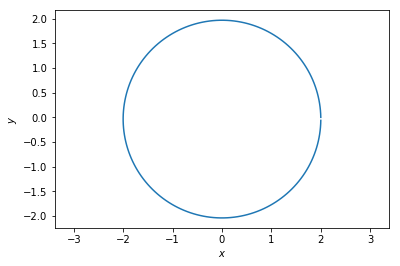

In [16]:
#Integrate with the Leap Frog Scheme
plot_frog_trajectory(s0,w0,0.1,T)

One can see that the accuracy of the leap frog scheme is way better than the accuracy of the forward Euler scheme. Already with large time step sizes ($\Delta{\tau}=0.1$) one gets good results.

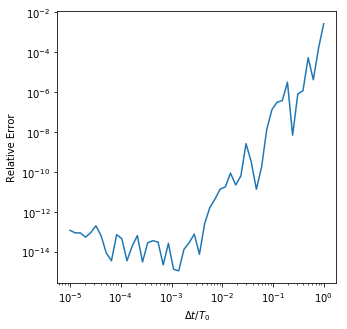

In [17]:
def energy_error_frog(d_tau):
    E0 = (np.linalg.norm(w0)**2)/2 - 1/np.linalg.norm(s0)
    s = leap_frog(s0, w0, d_tau, t_orbit(s0, w0))[0]
    w = leap_frog(s0, w0, d_tau, t_orbit(s0, w0))[1]
    Energy = (np.linalg.norm(w)**2)/2 - 1/np.linalg.norm(s)
    return np.abs(Energy-E0)/np.abs(E0)

dtau = np.logspace(-5,0,50)
error_frog = []

for i in dtau:
    error_frog.append(energy_error_frog(i))

plt.figure(figsize=(5.0,5.0))
plt.loglog(dtau,error_frog)
plt.xlabel(r'$\Delta t / T_0$')
plt.ylabel(r'Relative Error')

The leap frog scheme is indeed much more accurate. One can reach relative accuracy of $10^{-14}$!

The slope also changed, which indicates that the error scales with $\mathcal{O}(\Delta{t^3})$. For smaller time steps the integration does not become much more accurate. This leads to an optimal time step size (in this case $\Delta{\tau}\approx 10^{-3}$), where the integration is very accurate and does not take too much time.